<a href="https://colab.research.google.com/github/Pappas313/Computational-vision/blob/main/%CE%A5%CF%80%CE%BF%CE%BB%CE%BF%CF%83%CF%84%CE%B9%CE%BA%CE%AE_%CE%8C%CF%81%CE%B1%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Άσκηση #3, Μετασχηματισμός συνημίτονου:**

Θεωρήστε την εικόνα αποχρώσεων του γκρι
(grayscale image) “cameraman.bmp”.

**Ζητούμενα:**

**Α.** Υλοποιείστε τον ευθύ και τον αντίστροφο 2Δ μετασχηματισμό συνημίτονου (DCTIDCT) της εικόνας (να μη γίνει χρήση έτοιμων συναρτήσεων υπολογισμού του DCTIDCT).

**Β.** Υπολογίστε και τυπώστε το φάσμα του μετασχηματισμού.

**Γ.** Θεωρήστε διαδοχικά μόνο το 20%, 40%, 60%, 80% των συντελεστών (χαμηλότερες
συχνότητες) του DCT ανά άξονα και ανακατασκευάστε (με χρήση του αντίστροφου
μετασχηματισμού συνημίτονου) την αρχική εικόνα. Τυπώστε σε ένα ενιαίο σχήμα τις
ανακατασκευασμένες εικόνες. Τι παρατηρείτε?

**Δ.** Υπολογίστε το μέσο τετραγωνικό σφάλμα ανακατασκευής σε κάθε περίπτωση.

**Σημείωση**

Όπως στη περίπτωση του DFT, όσο μεγαλύτερο είναι το ποσοστό των συντελεστών του DCT τόσο περισσότερη πληροφορία διατηρείται στην ανασκευασμένη έκδοση της ωστόσο σε σχέση με τον DFT παρατηρείται μια σαφώς καλύτερη αναπαράσταση της εικόνας και ουσιαστικά το κύριο μέρος της να διατηρείται ακόμα και για χαμηλότερα ποσοστά.
Ο λόγος αυτής της ιδιότητας οφείλεται στο γεγονός ότι ο DCT περιέχει μόνο πραγματικές τιμές (αποτελεί το πραγματικό μέρος του DFT).



**Κώδικας**

import libraries

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

**Α. Υλοποίηση DCT και IDCT**


In [ ]:
def dct2(block):
    return np.fft.fft2(block, norm="ortho")

def idct2(block):
    return np.fft.ifft2(block, norm="ortho")

**Β. Υπολογισμός και εκτύπωση φάσματος DCT**

In [ ]:

def plot_dct_spectrum(image):
    dct_image = dct2(image)
    spectrum = np.log(np.abs(dct_image) + 1)  # Λογαριθμική κλίμακα για καλύτερη ορατότητα

    plt.figure(figsize=(8, 8))
    plt.imshow(spectrum, cmap='gray')
    plt.title('DCT Spectrum')
    plt.colorbar()
    plt.show()

**Γ. Ανακατασκευή εικόνας από το 20%, 40%, 60%, 80% των συντελεστών**

In [ ]:

def reconstruct_image(image, percentage):
    dct_image = dct2(image)
    threshold = np.percentile(np.abs(dct_image), 100 - percentage)
    mask = np.abs(dct_image) > threshold
    dct_image_low_freq = dct_image * mask
    reconstructed_image = idct2(dct_image_low_freq).real
    return reconstructed_image

**Ανάκτηση της εικόνας "cameraman.bmp"**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
image_path_source = '/content/drive/My Drive/Υπολογιστική όραση/Dataset_01/cameraman.bmp'
image = np.array(Image.open(image_path_source).convert("L"))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Βήμα Β: Υπολογισμός και εκτύπωση του φάσματος DCT**

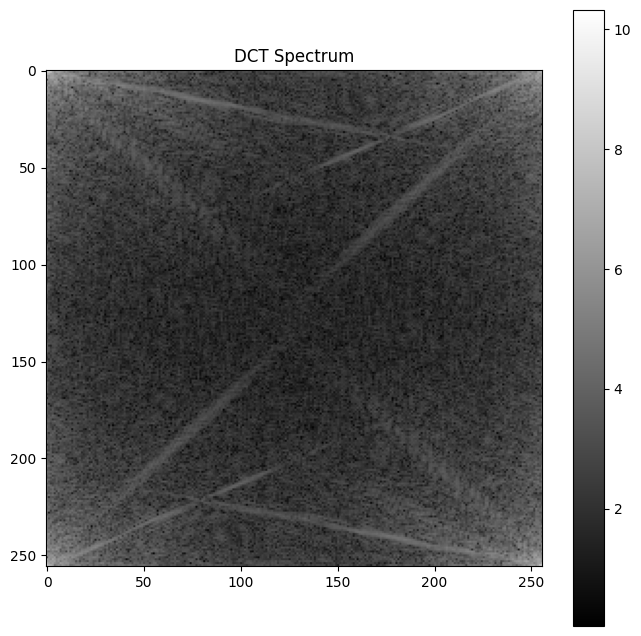

In [ ]:
plot_dct_spectrum(image)

**Δ. Ανακατασκευή και εκτύπωση αποτελεσμάτων για το 20%, 40%, 60%, 80% των συντελεστών**

In [ ]:
percentages = [20, 40, 60, 80]

**Reconstruct the image using the specified percentage of coefficients**

**Calculate and display the Mean Squared Error (MSE)**

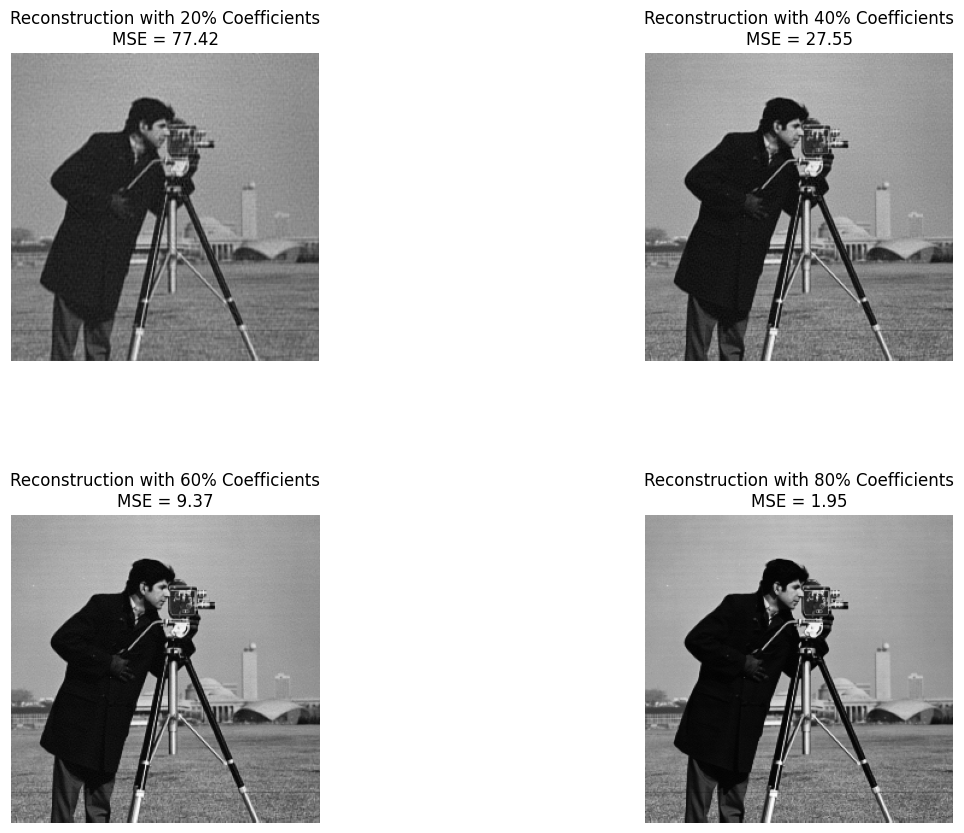

In [ ]:
plt.figure(figsize=(15, 10))
for i, percentage in enumerate(percentages, 1):

    reconstructed_image = reconstruct_image(image, percentage)


    mse = np.mean((image - reconstructed_image) ** 2)

    plt.subplot(2, 2, i)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.subplots_adjust(hspace=0.5)
    plt.title(f'Reconstruction with {percentage}% Coefficients\nMSE = {mse:.2f}')
    plt.axis('off')

plt.show()